In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
from google.colab import files
uploaded = files.upload()

Saving netflixoriginals.csv to netflixoriginals (1).csv


---
**Projenin bazı kısımlarında verinin ham hali tekrardan lazım olduğu için iki kez çıktı aldık.**

---

In [51]:
data = pd.read_csv("netflixoriginals.csv",encoding='ISO-8859-1' )
data2 = data.copy()
print(data.head(10))

                             Title                    Genre  \
0                  Enter the Anime              Documentary   
1                      Dark Forces                 Thriller   
2                          The App    Science fiction/Drama   
3                   The Open House          Horror thriller   
4                      Kaali Khuhi                  Mystery   
5                            Drive                   Action   
6                Leyla Everlasting                   Comedy   
7  The Last Days of American Crime      Heist film/Thriller   
8                          Paradox  Musical/Western/Fantasy   
9               Sardar Ka Grandson                   Comedy   

            Premiere  Runtime  IMDB Score          Language  
0     August 5, 2019       58         2.5  English/Japanese  
1    August 21, 2020       81         2.6           Spanish  
2  December 26, 2019       79         2.6           Italian  
3   January 19, 2018       94         3.2           Englis

In [52]:
data.shape

(584, 6)

In [53]:
data.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

Datasetimizde null değer bulunmamaktadır.

In [54]:
data.duplicated().sum()

0

Datasetimizde duplicated değer bulunmamaktadır.




**1. Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.**
---
---

Filmin uzun soluklu olması için süresinin 60 dakikadan uzun olması gerekiyor bu nedenle 60 dakikadan uzun olan filmleri inceleyeceğiz.

---

In [55]:
data_rt = data["Runtime"]

rt_list = []
for i in range(0,len(data)):
  if data_rt[i] >= 60 :
    rt_list.append(i)

rt_lang = data.loc[rt_list].reset_index()
rt_lang.head()

,index,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
1,2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
2,3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
3,4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
4,5,Drive,Action,"November 1, 2019",147,3.5,Hindi


In [56]:
lang=rt_lang["Language"].str.split('/', expand = True)
print(lang)


              0         1        2
0       Spanish      None     None
1       Italian      None     None
2       English      None     None
3         Hindi      None     None
4         Hindi      None     None
..          ...       ...      ...
510     English      None     None
511     English  Ukranian  Russian
512     English      None     None
513  Portuguese      None     None
514     English      None     None

[515 rows x 3 columns]


In [57]:
lang_1=lang[0].groupby([lang[0].values]).size()
lang_2=lang[1].groupby([lang[1].values]).size()
lang_3=lang[2].groupby([lang[2].values]).size()

langlists=pd.DataFrame(pd.concat([lang_1, lang_2,lang_3]))

langlists = langlists.groupby([langlists.index.values]).sum()

print(langlists)
print(type(langlists))

              0
Akan          1
Arabic        1
Basque        1
Catalan       1
Dutch         3
English     360
Filipino      2
French       21
German        5
Hindi        33
Indonesian    9
Italian      14
Japanese      6
Khmer         1
Korean        7
Malay         1
Mandarin      2
Marathi       3
Norwegian     1
Polish        3
Portuguese   10
Russian       2
Spanish      33
Swedish       1
Taiwanese     1
Tamil         1
Thai          2
Thia          1
Turkish       5
Ukranian      1
<class 'pandas.core.frame.DataFrame'>


In [58]:
langlists.columns = ["Langs"]

print(langlists.index.values)

['Akan' 'Arabic' 'Basque' 'Catalan' 'Dutch' 'English' 'Filipino' 'French'
 'German' 'Hindi' 'Indonesian' 'Italian' 'Japanese' 'Khmer' 'Korean'
 'Malay' 'Mandarin' 'Marathi' 'Norwegian' 'Polish' 'Portuguese' 'Russian'
 'Spanish' 'Swedish' 'Taiwanese' 'Tamil' 'Thai' 'Thia' 'Turkish'
 'Ukranian']


<function matplotlib.pyplot.show>

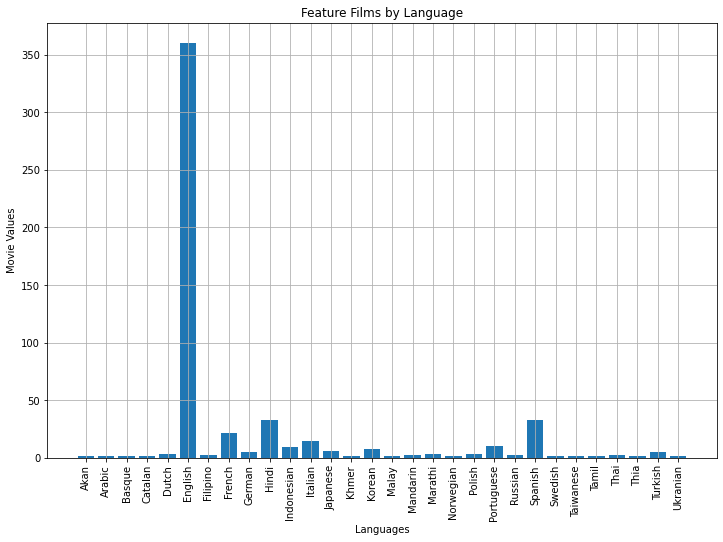

In [59]:
fig = plt.figure(figsize = (12,8))
plt.bar(langlists.index.values,langlists["Langs"])
plt.xticks(rotation=90)

plt.title("Feature Films by Language")
plt.xlabel("Languages")
plt.ylabel("Movie Values")

plt.grid()
plt.show

---
Grafikten de görüldüğü veri setimizde uzun soluklu filmlerde en çok kullanılan dil açık ara İngilizce'dir.

---


**2. 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.**
---
---




**Tarih Değiştirme**

Premier tarihleri olarak "ay ismi gün, yıl" olarak veriler verilmiş ve bu 
verileri sayısal tarihlere dönüştürmemiz gerekiyor. Fakat bu değişimi yapmadan önce bazı tarihler "," yerine "." kullanıldığı farkedilmiştir. Bu nedenle öncelikle "." sembolü "," sembolüne döndürülmüştür daha sonra ise tarih verisi sayısal olarak elde edilmiştir.



In [60]:
premiere = list(data["Premiere"])

premiere2 = []
for i in list(premiere):
  i = i.replace(".", ",")
  premiere2.append(i)

print(premiere2[111])


October 16, 2019


In [61]:
from datetime import datetime

premiere3= []

for date in list(premiere2):
  date2 = datetime.strptime(date, "%B %d, %Y")
  date3 = date2.strftime("%Y-%m-%d")
  premiere3.append(date3)

print(premiere3)

['2019-08-05', '2020-08-21', '2019-12-26', '2018-01-19', '2020-10-30', '2019-11-01', '2020-12-04', '2020-06-05', '2018-03-23', '2021-05-18', '2021-04-22', '2020-11-27', '2020-09-18', '2020-10-01', '2016-11-22', '2019-12-19', '2020-01-01', '2020-02-21', '2021-01-01', '2017-08-25', '2019-09-13', '2019-07-18', '2019-08-16', '2021-02-26', '2021-04-09', '2020-07-16', '2021-04-02', '2020-07-31', '2021-02-10', '2018-12-07', '2019-05-24', '2016-10-28', '2019-02-22', '2019-12-03', '2019-10-25', '2020-07-15', '2020-07-14', '2020-11-30', '2019-01-18', '2021-03-05', '2020-04-02', '2020-10-02', '2020-12-25', '2020-12-04', '2017-01-06', '2020-05-01', '2020-10-28', '2017-01-20', '2020-04-10', '2015-12-11', '2020-04-17', '2020-08-14', '2019-11-28', '2020-10-30', '2020-01-23', '2018-07-13', '2020-10-15', '2016-07-15', '2021-02-11', '2020-10-22', '2017-01-13', '2020-04-03', '2018-04-20', '2021-02-25', '2020-07-23', '2017-09-08', '2019-08-21', '2020-07-03', '2020-11-22', '2018-07-20', '2019-02-22', '2021

In [62]:
data["Premiere_numeric"] = premiere3
print(data.head())

             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language Premiere_numeric  
0         2.5  English/Japanese       2019-08-05  
1         2.6           Spanish       2020-08-21  
2         2.6           Italian       2019-12-26  
3         3.2           English       2018-01-19  
4         3.4             Hindi       2020-10-30  


---

In [63]:
print(data["Premiere_numeric"])

0      2019-08-05
1      2020-08-21
2      2019-12-26
3      2018-01-19
4      2020-10-30
          ...    
579    2018-12-31
580    2015-10-09
581    2018-12-16
582    2020-12-08
583    2020-10-04
Name: Premiere_numeric, Length: 584, dtype: object


In [64]:
data_doc = data[data["Genre"] == "Documentary"]
print(data_doc.head())

                                Title        Genre            Premiere  \
0                     Enter the Anime  Documentary      August 5, 2019   
10               Searching for Sheela  Documentary      April 22, 2021   
15                     After the Raid  Documentary   December 19, 2019   
20  Hello Privilege. It's Me, Chelsea  Documentary  September 13, 2019   
30                        After Maria  Documentary        May 24, 2019   

    Runtime  IMDB Score          Language Premiere_numeric  
0        58         2.5  English/Japanese       2019-08-05  
10       58         4.1           English       2021-04-22  
15       25         4.3           Spanish       2019-12-19  
20       64         4.4           English       2019-09-13  
30       37         4.6   English/Spanish       2019-05-24  


In [65]:
data_doc2 = data_doc[data_doc["Premiere_numeric"] <= "2020-06-30" ]
data_doc3 = data_doc2["2019-01-01" <= data_doc2["Premiere_numeric"] ]
print(data_doc3.head())

                                 Title        Genre            Premiere  \
0                      Enter the Anime  Documentary      August 5, 2019   
15                      After the Raid  Documentary   December 19, 2019   
20   Hello Privilege. It's Me, Chelsea  Documentary  September 13, 2019   
30                         After Maria  Documentary        May 24, 2019   
111               Ghosts of Sugar Land  Documentary    October 16. 2019   

     Runtime  IMDB Score          Language Premiere_numeric  
0         58         2.5  English/Japanese       2019-08-05  
15        25         4.3           Spanish       2019-12-19  
20        64         4.4           English       2019-09-13  
30        37         4.6   English/Spanish       2019-05-24  
111       21         5.5           English       2019-10-16  


In [66]:
data_doc4 = data_doc3.sort_values("Premiere_numeric")
print(data_doc4.head())

                                            Title        Genre  \
510           ReMastered: Massacre at the Stadium  Documentary   
482  Fyre: The Greatest Party That Never Happened  Documentary   
511     ReMastered: The Two Killings of Sam Cooke  Documentary   
524                      Period. End of Sentence.  Documentary   
324     Antoine Griezmann: The Making of a Legend  Documentary   

              Premiere  Runtime  IMDB Score         Language Premiere_numeric  
510   January 11, 2019       64         7.3  English/Spanish       2019-01-11  
482   January 18, 2019       97         7.2          English       2019-01-18  
511   February 8, 2019       64         7.3          English       2019-02-08  
524  February 12, 2019       26         7.4    English/Hindi       2019-02-12  
324     March 21, 2019       60         6.5           French       2019-03-21  


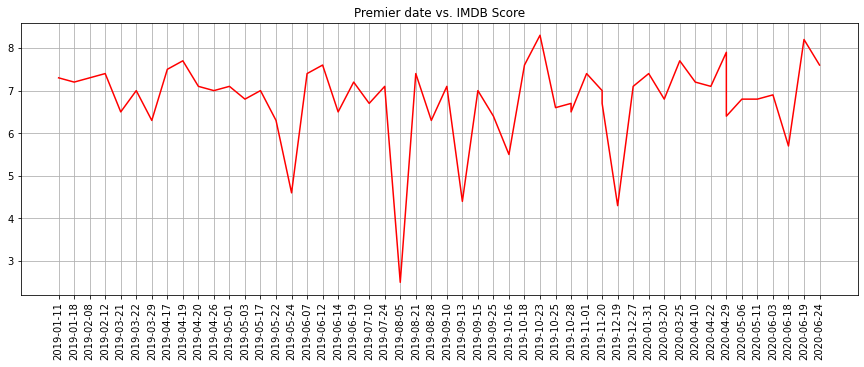

In [67]:
#Create a figure object of the size 18x5
fig = plt.figure(figsize = (15,5))

plt.plot(data_doc4["Premiere_numeric"], data_doc4["IMDB Score"], color = "red")
plt.title("Premier date vs. IMDB Score")
plt.grid()
plt.xticks(rotation=90)
plt.show()

**3. İngilizce çekilen filmler içerisinde en yüksek IMDB puanına sahip tür.**
---
---

In [68]:
data["Language"] = data["Language"].str.split("/")
data["Language"]

0               [English, Japanese]
1                         [Spanish]
2                         [Italian]
3                         [English]
4                           [Hindi]
                   ...             
579                       [English]
580    [English, Ukranian, Russian]
581                       [English]
582                    [Portuguese]
583                       [English]
Name: Language, Length: 584, dtype: object

---
Verimizden sadece İngilizce diline sahip olan filmleri çekmek için bir takım ön işlem uyguluyoruz.

---

In [69]:
data_lang = data["Language"]

data_lang_len = len(data_lang)
true_list = []

for i in range(0,data_lang_len):
  a = "English" in data_lang[i]
  if a == True:
    true_list.append(i)

print(true_list)
data_eng = data.loc[true_list].reset_index()


[0, 3, 7, 8, 10, 14, 17, 19, 20, 21, 22, 24, 25, 27, 30, 31, 34, 38, 40, 42, 44, 47, 48, 49, 51, 52, 55, 57, 60, 61, 62, 64, 65, 66, 67, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 90, 93, 94, 95, 99, 101, 103, 104, 105, 107, 108, 111, 113, 114, 115, 116, 119, 120, 121, 122, 123, 124, 125, 127, 129, 130, 131, 133, 134, 136, 138, 139, 140, 141, 143, 145, 146, 148, 149, 150, 152, 153, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 170, 171, 172, 173, 174, 175, 179, 180, 181, 182, 183, 184, 185, 187, 188, 191, 192, 193, 194, 195, 196, 197, 198, 199, 202, 203, 204, 205, 207, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 238, 239, 240, 243, 244, 247, 250, 251, 253, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 275, 277, 279, 280, 281, 282, 283, 285, 286, 287, 289, 290, 291, 293, 294, 295, 297, 298, 299, 301, 303, 304, 305, 306, 308, 309, 310, 312, 314, 315

In [70]:
data_eng = data_eng.sort_values("IMDB Score", ascending = False)
best_eng_movie = data_eng.loc[0]
print("The name of the best English movie: ", best_eng_movie["Title"])
print("The genre of English movie which has the highest IMDB Score: ",best_eng_movie["Genre"])

The name of the best English movie:  Enter the Anime
The genre of English movie which has the highest IMDB Score:  Documentary


---
İngilizce dilinde çekilen en yüksek IMDB puanlı filmin türü "Documentary" dir.

---

**4. 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?**
---
---

In [71]:
true_list2 = []

for i in range(0,data_lang_len):
  a = "Hindi" in data_lang[i]
  if a == True:
    true_list2.append(i)

data_hindi = data.loc[true_list2].reset_index()
print(data_hindi.head())

   index                  Title             Genre           Premiere  Runtime  \
0      4            Kaali Khuhi           Mystery   October 30, 2020       90   
1      5                  Drive            Action   November 1, 2019      147   
2      9     Sardar Ka Grandson            Comedy       May 18, 2021      139   
3     16          Ghost Stories  Horror anthology    January 1, 2020      144   
4     23  The Girl on the Train          Thriller  February 26, 2021      120   

   IMDB Score Language Premiere_numeric  
0         3.4  [Hindi]       2020-10-30  
1         3.5  [Hindi]       2019-11-01  
2         4.1  [Hindi]       2021-05-18  
3         4.3  [Hindi]       2020-01-01  
4         4.4  [Hindi]       2021-02-26  


In [72]:
print("Average runtime of movies shot in 'Hindi' language: ",data_hindi["Runtime"].mean(), " minutes")

Average runtime of movies shot in 'Hindi' language:  111.02857142857142  minutes


---
Hinçe dilinde çekilmiş filmlerin ortalama "Runtime" verileri 111.028 dir.

---

**5. 'Genre' sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.**
---
---

In [73]:
films99=data["Genre"].str.upper()
data["Genre2"]=films99.str.split('[-,/, ]')
data["Genre2"].head()

0                [DOCUMENTARY]
1                   [THRILLER]
2    [SCIENCE, FICTION, DRAMA]
3           [HORROR, THRILLER]
4                    [MYSTERY]
Name: Genre2, dtype: object

In [74]:
films=data.Genre.str.upper()
films=films.str.split('[-,/, ]', expand = True)
films_1=films[0].groupby([films[0].values]).size()
films_2=films[1].groupby([films[1].values]).size()
films_3=films[2].groupby([films[2].values]).size()
films_4=films[3].groupby([films[3].values]).size()

lists=pd.DataFrame(pd.concat([films_1, films_2,films_3,films_4]))
lists.drop(['','OF','ONE'],axis=0,inplace=True)
lists.groupby([lists.index.values]).sum()

print(lists.groupby(lists.index.values).sum())
print("Genre:",len(lists.groupby(lists.index.values).size()))

            0
ACTION     21
ADVENTURE  10
AFTERSHOW   6
AGE         1
ANIMATED    1
...        ..
URBAN       1
VARIETY     5
WAR         5
WESTERN     4
ZOMBIE      1

[64 rows x 1 columns]
Genre: 64


In [75]:
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_numeric,Genre2
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,"[English, Japanese]",2019-08-05,[DOCUMENTARY]
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,[Spanish],2020-08-21,[THRILLER]
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,[Italian],2019-12-26,"[SCIENCE, FICTION, DRAMA]"
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,[English],2018-01-19,"[HORROR, THRILLER]"
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,[Hindi],2020-10-30,[MYSTERY]


<function matplotlib.pyplot.show>

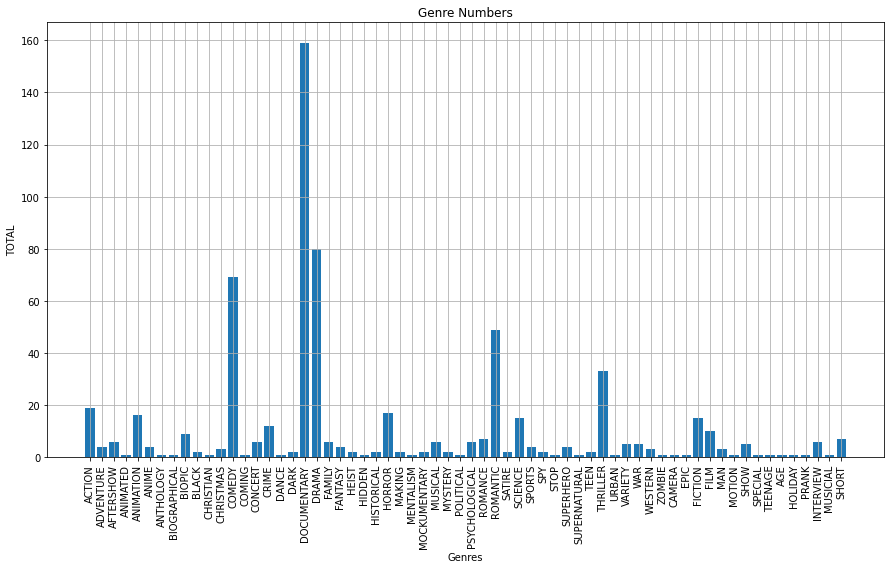

In [76]:
fig = plt.figure(figsize = (15,8))
plt.bar(lists.index.values, lists[0])
plt.xticks(rotation=90)

plt.title("Genre Numbers")
plt.xlabel("Genres")
plt.ylabel("TOTAL")

plt.grid()
plt.show

**6. Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.**
---
---



In [77]:
best_lang = data["Language"].value_counts()
top3_lang= best_lang[:3]
print("The 3 most used languages in the movies in the dataset:")
print(top3_lang)

The 3 most used languages in the movies in the dataset:
[English]    401
[Hindi]       33
[Spanish]     31
Name: Language, dtype: int64


---
Veri setinde bulunan filmlerde en çok kullanılan 3 dil sırasıyla İngilizce, Hintçe ve İspanyolca'dır.

---

**7. IMDB puanı en yüksek olan ilk 10 film hangileridir?**
---
---

In [78]:
data_imdb = data.sort_values("IMDB Score", ascending = False)
data_top10 = data_imdb.reset_index().loc[0:10]
data_top10["Title"]

0        David Attenborough: A Life on Our Planet
1       Emicida: AmarElo - It's All For Yesterday
2                         Springsteen on Broadway
3     Winter on Fire: Ukraine's Fight for Freedom
4           Taylor Swift: Reputation Stadium Tour
5      Ben Platt: Live from Radio City Music Hall
6                          Dancing with the Birds
7                         Cuba and the Cameraman 
8                                           Klaus
9                                            13th
10              Disclosure: Trans Lives on Screen
Name: Title, dtype: object

**8. IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.**
---
---

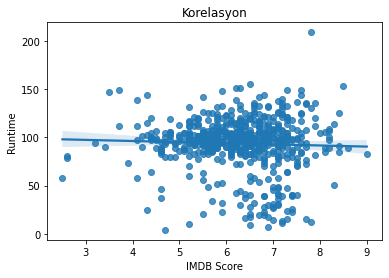

In [79]:
sns.regplot(data=data,x='IMDB Score',y='Runtime');
plt.title('Korelasyon')
plt.show()

---
Korelasyon çizgisinin x eksenine hemen hemen paralel olması bize bu grafikte, "IMDB Score" - "Runtime" verileri arasında dikkate değer bir ilişki olmadığı  göstermektedir. 

---

**9. IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.**
---
---

---
Bazı türlerde çok az sayıda film bulunduğu için türün ortalama IMDB puanı gerçekçi bir veri olmayacaktır. Bu nedenle en az 5 filme sahip olan türler incelenmiştir.

---

In [80]:
genres1 = []
data_genre_values = data2["Genre"].value_counts()
data_gv_index = data_genre_values.index
for i in list(data_gv_index):
  if data_genre_values[i] >= 5:
    genres1.append(i)
genres1

genres2 = []

for  i in range(0, len(data2)):
  for genre in list(genres1):
    if data2["Genre"][i] == genre:
      genres2.append(i)

selected_genres = data.loc[genres2]
print(selected_genres)

                                           Title         Genre  \
0                                Enter the Anime   Documentary   
1                                    Dark Forces      Thriller   
5                                          Drive        Action   
6                              Leyla Everlasting        Comedy   
9                             Sardar Ka Grandson        Comedy   
..                                           ...           ...   
578   Ben Platt: Live from Radio City Music Hall  Concert Film   
579        Taylor Swift: Reputation Stadium Tour  Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom   Documentary   
582    Emicida: AmarElo - It's All For Yesterday   Documentary   
583     David Attenborough: A Life on Our Planet   Documentary   

              Premiere  Runtime  IMDB Score                      Language  \
0       August 5, 2019       58         2.5           [English, Japanese]   
1      August 21, 2020       81         2.6          

In [81]:
films_genre=selected_genres.groupby(['Genre']).median().sort_values(by=['IMDB Score'],ascending=False).head(10)
print(films_genre)

                       Runtime  IMDB Score
Genre                                     
Concert Film              93.5        7.60
Animation                 47.0        7.10
Aftershow / Interview     25.5        7.00
Documentary               86.0        7.00
Crime drama              106.0        6.90
Romance                  104.0        6.55
Drama                    104.0        6.40
Comedy-drama             101.5        6.25
Biopic                   106.0        6.20
Romantic comedy           99.0        5.80


<function matplotlib.pyplot.show>

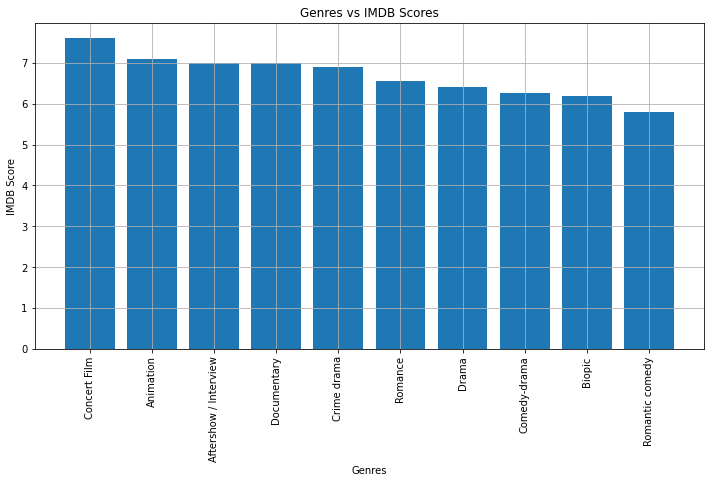

In [82]:
fig = plt.figure(figsize = (12,6))
plt.bar(films_genre.index, films_genre["IMDB Score"])
plt.xticks(rotation=90)

plt.title("Genres vs IMDB Scores")
plt.xlabel("Genres")
plt.ylabel("IMDB Score")

plt.grid()
plt.show

**10. 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.**
---
---

In [83]:
data_rt = data.sort_values("Runtime", ascending = False)
data_top10 = data_rt.reset_index().loc[0:9]
data_top10["Title"]

0                       The Irishman
1                        Da 5 Bloods
2            Springsteen on Broadway
3                           Citation
4                 The Forest of Love
5                     Raat Akeli Hai
6    The Last Days of American Crime
7                               Ludo
8                   Army of the Dead
9                              Drive
Name: Title, dtype: object

<function matplotlib.pyplot.show>

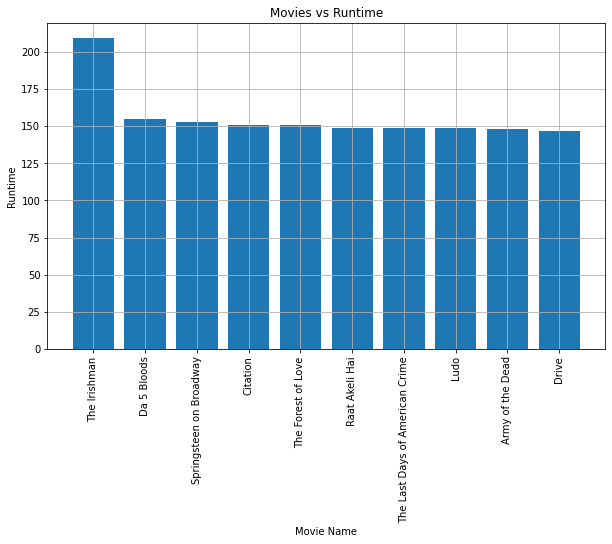

In [84]:
fig = plt.figure(figsize = (10,6))

plt.bar(data_top10["Title"], data_top10["Runtime"])
plt.xticks(rotation=90)
plt.title("Movies vs Runtime")
plt.xlabel("Movie Name")
plt.ylabel("Runtime")
plt.grid()
plt.show

**11. Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.**
---
---

In [85]:
premiere = list(data["Premiere"])

premiere5 = []
for date in list(premiere2):
  date2 = datetime.strptime(date, "%B %d, %Y")
  date4 = date2.strftime("%Y")
  date5= int(date4)
  premiere5.append(date5)

data["Year"] = premiere5


In [86]:
data_year = data["Year"].value_counts().reset_index()
data_year["year"] = data_year["index"]
data_year["number of movies"] = data_year["Year"]
data_year.drop("index", inplace=True, axis=1)
data_year.drop("Year", inplace=True, axis=1)

print("En fazla film yayınlanan yıl:", data_year["year"].loc[0])

En fazla film yayınlanan yıl: 2020


<function matplotlib.pyplot.show>

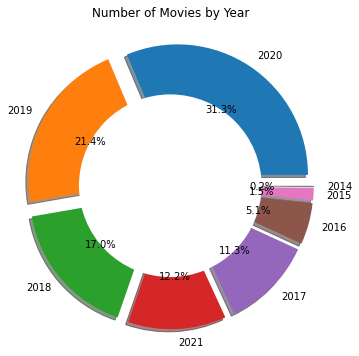

In [87]:
fig = plt.figure(figsize = (10,6))
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.pie(data_year["number of movies"], explode = explode , labels=data_year["year"], shadow = True, autopct='%1.1f%%')

plt.title("Number of Movies by Year")
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show

**13. Hangi yılın toplam "runtime" süresi en fazladır?**
---
---

In [88]:
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_numeric,Genre2,Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,"[English, Japanese]",2019-08-05,[DOCUMENTARY],2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,[Spanish],2020-08-21,[THRILLER],2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,[Italian],2019-12-26,"[SCIENCE, FICTION, DRAMA]",2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,[English],2018-01-19,"[HORROR, THRILLER]",2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,[Hindi],2020-10-30,[MYSTERY],2020


In [89]:
data_year2= data_year["year"].sort_values().reset_index().drop("index", inplace=False, axis=1)
print(data_year2)

   year
0  2014
1  2015
2  2016
3  2017
4  2018
5  2019
6  2020
7  2021


In [90]:
print(data_year2["year"])

0    2014
1    2015
2    2016
3    2017
4    2018
5    2019
6    2020
7    2021
Name: year, dtype: int64


In [91]:
list_rt= []


for year in list(data_year2["year"]):
  rt=0
  for i in range(0, len(data)):
    if year == data["Year"][i]:
      rt = data["Runtime"][i] + rt
  list_rt.append(rt)
  
max_ind = list_rt.index(max(list_rt))

print("Toplam runtime süresi en uzun olan yıl: ",data_year2["year"][max_ind])

Toplam runtime süresi en uzun olan yıl:  2020


---
Toplam runtime süresi en uzun olan yıl:  2020

---

**14. Her bir dilin en fazla kullanıldığı "Genre" nedir?**
---
---

In [92]:
data2.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [93]:
films=data2.Language.str.split('[-,/, ]', expand = True)

films_1=films[0].groupby([films[0].values]).size()
films_2=films[1].groupby([films[1].values]).size()
films_3=films[2].groupby([films[2].values]).size()

language=pd.DataFrame(pd.concat([films_1, films_2,films_3]))
language_2=language.groupby(language.index.values).sum()

for i in range(len(language_2)):
  
  film_genre=data2.loc[(data2["Language"] == language_2.index.values[i])]
  if film_genre.index.values != []:
    film_genre_total = film_genre.groupby(film_genre.Genre).size().sort_values(ascending=False).head(1)
    print(f"Language:{language_2.index.values[i]}",", Popular Genre:",film_genre_total.index.values)

Language:Dutch , Popular Genre: ['Crime drama']
Language:English , Popular Genre: ['Documentary']
Language:Filipino , Popular Genre: ['Drama']
Language:French , Popular Genre: ['Documentary']
Language:German , Popular Genre: ['Drama']
Language:Hindi , Popular Genre: ['Drama']
Language:Indonesian , Popular Genre: ['Drama']
Language:Italian , Popular Genre: ['Drama']
Language:Japanese , Popular Genre: ['Anime/Science fiction']
Language:Korean , Popular Genre: ['Drama']
Language:Marathi , Popular Genre: ['Drama']
Language:Polish , Popular Genre: ['Horror']
Language:Portuguese , Popular Genre: ['Comedy']
Language:Spanish , Popular Genre: ['Documentary']
Language:Thai , Popular Genre: ['Documentary']
Language:Turkish , Popular Genre: ['Comedy']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


**15. Veri setinde outlier veri var mıdır? Açıklayınız.**
---
---

In [94]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

---
Outlier verilerin tespiti için yaygın şekilde kullanılan z-score methodunu kullandık. Verilerimizden elde ettiğimiz z-score değerleri eğer threshold değerimiz olan üçten büyük ise verimiz outlier veridir.

---

In [95]:
outliers=[]
detect_outlier(data["Runtime"])
outliers_rt = outliers
outliers=[]
detect_outlier(data["IMDB Score"])
outliers_imdb = outliers
print("Runtime sütunundaki outlier veriler: ",outliers_rt)
print("IMDB Score sütunundaki outlier veriler: ",outliers_imdb)

Runtime sütunundaki outlier veriler:  [4, 10, 9, 7, 209]
IMDB Score sütunundaki outlier veriler:  [2.5, 2.6, 2.6, 3.2]


Runtime sütunundaki outlier veriler:  [4, 10, 9, 7, 209]

IMDB Score sütunundaki outlier veriler:  [2.5, 2.6, 2.6, 3.2]

---